In [24]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [63]:
from proj1_helpers import *
DATA_TRAIN_PATH = "train.csv" # download train data and supply path
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Implementation

In [64]:
print("shape of x {}".format(tX.shape))
print("shape of y {}".format(y.shape))
print("shape of ids {}".format(ids.shape))

shape of x (250000, 30)
shape of y (250000,)
shape of ids (250000,)


In [74]:
from data_analysis import *

##### Data analysis #####

#Separate the data
jet_num = 0
y0, tX0, ids0, _ = extract_jet_num(jet_num, y, tX, ids)
jet_num = 1
y1, tX1, ids1, _ = extract_jet_num(jet_num, y, tX, ids)
jet_num = 2
y2, tX2, ids2, _ = extract_jet_num(jet_num, y, tX, ids)
jet_num = 3
y3, tX3, ids3, _ = extract_jet_num(jet_num, y, tX, ids)

#Standarize the data
# tX0, m0, std0 = standardize(tX0)
# tX1, m1, std1 = standardize(tX1)
# tX2, m2, std2 = standardize(tX2)
# tX3, m3, std3 = standardize(tX3)


In [75]:
print("shape of x0 {}".format(tX0.shape))
print("shape of y0 {}".format(y0.shape))
print("shape of ids0 {}".format(ids0.shape))
print("shape of x1 {}".format(tX1.shape))
print("shape of y1 {}".format(y1.shape))
print("shape of ids1 {}".format(ids1.shape))
print("shape of x2 {}".format(tX2.shape))
print("shape of y2 {}".format(y2.shape))
print("shape of ids2 {}".format(ids2.shape))
print("shape of x3 {}".format(tX3.shape))
print("shape of y3 {}".format(y3.shape))
print("shape of ids3 {}".format(ids3.shape))

shape of x0 (99913, 21)
shape of y0 (99913,)
shape of ids0 (99913,)
shape of x1 (77544, 24)
shape of y1 (77544,)
shape of ids1 (77544,)
shape of x2 (50379, 30)
shape of y2 (50379,)
shape of ids2 (50379,)
shape of x3 (22164, 30)
shape of y3 (22164,)
shape of ids3 (22164,)


67.34150657750801
11.497569953977356
4.750810162102793


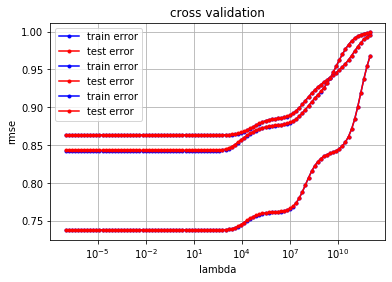

In [123]:
from implementation import *
from optimization import * 

##### Machine learning #####

# Define the parameters of the algorithm.
#D = tX.shape[1]

# Start gradient descent.
w, loss = least_squares(y, tX)
w0, loss0 = least_squares(y0, tX0)
w1, loss1 = least_squares(y1, tX1)
w2, loss2 = least_squares(y2, tX2)
w3, loss3 = least_squares(y3, tX3)

# print(w)

##### Cross validation #####

best_lambda0 = cross_validation_lambda(y0, tX0)
print(best_lambda0)

best_lambda1 = cross_validation_lambda(y1, tX1)
print(best_lambda1)

best_lambda2 = cross_validation_lambda(y2, tX2)
print(best_lambda2)

# Logistic regression
# ...

## Generate predictions and save ouput in csv format for submission:

In [77]:
DATA_TEST_PATH = "test.csv" #download train data and supply path
y_te, tX_te, ids_te = load_csv_data(DATA_TEST_PATH)

In [78]:
print("shape of x {}".format(tX_te.shape))
print("shape of ids {}".format(ids_te.shape))

shape of x (568238, 30)
shape of ids (568238,)


In [79]:
from data_analysis import * 

##### Test on test dataset #####

#Separate the data
jet_num = 0
y0_te, tX0_te, ids0_te, _ = extract_jet_num(jet_num, y_te, tX_te, ids_te)
jet_num = 1
y1_te, tX1_te, ids1_te, _ = extract_jet_num(jet_num, y_te, tX_te, ids_te)
jet_num = 2
y2_te, tX2_te, ids2_te, _ = extract_jet_num(jet_num, y_te, tX_te, ids_te)
jet_num = 3
y3_te, tX3_te, ids3_te, _ = extract_jet_num(jet_num, y_te, tX_te, ids_te)

#Standarize the data
#tX0_te = standardize_te(tX0_te, m0, std0)
#tX1_te = standardize_te(tX1_te, m1, std1)
#tX2_te = standardize_te(tX2_te, m2, std2)
#tX3_te = standardize_te(tX3_te, m3, std3)


In [80]:
print("shape of x0 {}".format(tX0_te.shape))
print("shape of ids0 {}".format(ids0_te.shape))
print("shape of x1 {}".format(tX1_te.shape))
print("shape of ids1 {}".format(ids1_te.shape))
print("shape of x2 {}".format(tX2_te.shape))
print("shape of ids2 {}".format(ids2_te.shape))
print("shape of x3 {}".format(tX3_te.shape))
print("shape of ids3 {}".format(ids3_te.shape))

shape of x0 (227458, 21)
shape of ids0 (227458,)
shape of x1 (175338, 24)
shape of ids1 (175338,)
shape of x2 (114648, 30)
shape of ids2 (114648,)
shape of x3 (50794, 30)
shape of ids3 (50794,)


In [81]:
OUTPUT_PATH = 'results0.csv' #name of output file for submission
y0_pred = predict_labels(w0, tX0_te)
OUTPUT_PATH = 'results1.csv'
y1_pred = predict_labels(w1, tX1_te)
OUTPUT_PATH = 'results2.csv'
y2_pred = predict_labels(w2, tX2_te)
OUTPUT_PATH = 'results3.csv'
y3_pred = predict_labels(w3, tX3_te)

In [82]:
y_pred = np.concatenate([y0_pred, y1_pred, y2_pred, y3_pred])
ids_pred = np.concatenate([ids0_te, ids1_te, ids2_te, ids3_te])
OUTPUT_PATH = 'results.csv' 
create_csv_submission(ids_pred, y_pred, OUTPUT_PATH)